In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# def logistic(X, y, lr = 1e-4, approx=1e-5):
#   X = np.vstack((X, np.ones((1, X.shape[1]))))
#   w_init = np.random.rand(X.shape[0], 1)
#   w = [w_init]
#   f_check = 20
#   w_last_check = w_init
#   count = 0
#   while True:
#     z = sigmoid(w[-1].T.dot(X))
#     w_new = w[-1] - lr * ((z - y).dot(X.T)).T
#     w.append(w_new)
#     if count % f_check == 0:
#       if np.linalg.norm(w[-1] - w_last_check) <= approx or count >= 1000000:
#         break    
#       w_last_check = w[-1]
#     count += 1
#   print('count:', count)
#   return w[-1]

In [0]:
'''
This code for logistic with gradient_descent function
'''

def myGD(derivative, w_init, loss_function, lr=1e-3*0.5, approx=1e-6):
  w = [w_init]
  w_last_check = w[-1]
  f_check = 20
  count = 1
  max_count = 1000000
  loss = []
  while True:
    w_new = w[-1] - lr * derivative(w[-1])
    w.append(w_new)
    if count % f_check == 0:
      l = loss_function(w[-1])
      loss.append(l)
      if np.linalg.norm(w[-1] - w_last_check) <= approx or count >= max_count:
          break
      w_last_check = w[-1]
    count += 1
  print('count:', count)
  return w[-1], loss

class Logistic:
  def __init__(self, learning_rate=1e-4, approximation=1e-5):
    self.lr = learning_rate
    self.approx = approximation
    self.coeff = None
    self.intercept = None
    self.loss = []
  
  @property
  def coeff_(self):
    return self.coeff

  @property
  def intercept_(self):
    return self.intercept

  @property
  def loss_(self):
    return np.array(self.loss)

  def _grad(self, w):
    z = self._sigmoid(w.T.dot(self.X))
    return ((z - self.y).dot(self.X.T)).T

  def fit(self, X, y):
    X = np.vstack((X, np.ones((1, X.shape[1]))))
    self.X = X.copy()
    self.y = y.copy()
    w_init = np.random.rand(X.shape[0], 1)    
    _w, self.loss = myGD(self._grad, w_init, self._loss_calc, self.lr, self.approx)
    self.coeff = _w[:-1]
    self.intercept = _w[-1]
    return True 
  
  def predict(self, X):
    X = np.vstack((X, np.ones((1, X.shape[1]))))
    w = np.vstack((self.coeff_, self.intercept_))
    s = w.T.dot(X)
    return self._sigmoid(s)
  
  def _loss_calc(self, w):
    z = self._sigmoid(w.T.dot(self.X))
    N = self.y.shape[1]
    m = -(self.y * np.log(z) + (1-self.y)*np.log(1-z))
    return np.sum(m) / N
  
  def _sigmoid(self, s):
    return 1/(1 + np.e ** (-s)) 

In [0]:
'''
This code for logistic without gradient_descent function
'''
# class Logistic:
#   def __init__(self, learning_rate=1e-4, approximation=1e-5):
#     self.lr = learning_rate
#     self.approx = approximation
#     self.coeff = None
#     self.intercept = None
#     self.loss = []
  
#   @property
#   def coeff_(self):
#     return self.coeff

#   @property
#   def intercept_(self):
#     return self.intercept

#   @property
#   def loss_(self):
#     return np.array(self.loss)

  

#   def fit(self, X, y):
#     X = np.vstack((X, np.ones((1, X.shape[1]))))
#     w_init = np.random.rand(X.shape[0], 1)
#     w = [w_init]
#     f_check = 20
#     w_last_check = w_init
#     count = 0
#     while True:
#       z = self._sigmoid(w[-1].T.dot(X))
#       w_new = w[-1] - self.lr * ((z - y).dot(X.T)).T
#       w.append(w_new)      
#       if count % f_check == 0:
#         if np.linalg.norm(w[-1] - w_last_check) <= self.approx or count >= 1000000:
#           break    
#         w_last_check = w[-1]
#         l = self._loss_calc(z, y)
#         self.loss.append(l)
#       count += 1
#     print('count:', count)
#     _w = w[-1]
#     self.coeff = _w[:-1]
#     self.intercept = _w[-1]
#     return True 
  
#   def predict(self, X):
#     X = np.vstack((X, np.ones((1, X.shape[1]))))
#     w = np.vstack((self.coeff_, self.intercept_))
#     s = w.T.dot(X)
#     return self._sigmoid(s)

#   @classmethod  
#   def _loss_calc(cls, z, y):
#     N = y.shape[1]
#     m = -(y * np.log(z) + (1-y)*np.log(1-z))
#     return np.sum(m) / N
#   @classmethod
#   def _sigmoid(cls, s):
#     return 1/(1 + np.e ** (-s)) 

In [0]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]).reshape(1,-1)

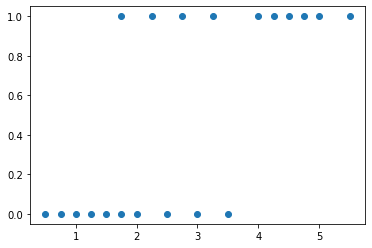

In [21]:
plt.scatter(X, y)

In [22]:
print(X.shape)
print(y.shape)

(1, 20)
(1, 20)


In [23]:
lg = Logistic()
w = lg.fit(X,y)

count: 168020


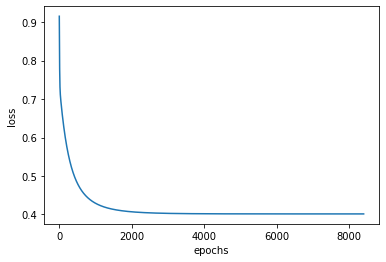

In [24]:
plt.plot(lg.loss_)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [25]:
print(lg.coeff_)

[[1.49913487]]


In [0]:
_predict = lg.predict(X)

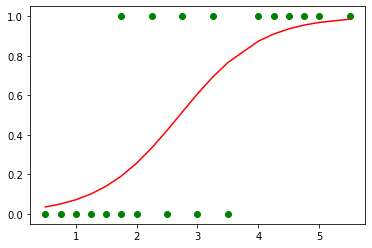

In [27]:
plt.scatter(X.reshape(-1,1), y.reshape(-1,1), marker='o', c='g')
plt.plot(X.reshape(-1,1), _predict.reshape(-1,1), 'r-')